In [22]:
import json
import numpy as np
import matplotlib.pyplot as plt

# import species_data.json

with open(r'C:\Users\IT\Documents\UCL\OPUS\Results\three_species\Baseline\other_results_Baseline.json') as f:
    data = json.load(f)

In [23]:
data

{'1': {'ror': [0.19498435377845175,
   0.20543075781196296,
   0.20704472797295703,
   0.20742393390278624,
   0.20752196309998616,
   -0.032065617428552934,
   -0.1473555318865278,
   -0.19999171383746125,
   -0.2008638019031703,
   -0.20169381891763344,
   -0.202484715596297,
   -0.20323918590892376,
   -0.20395968479614596,
   -0.20464845374985188,
   -0.205307541379338,
   -0.2059388238729208,
   -0.2065440224192682,
   -0.2071247188936365,
   -0.20768236967724055,
   -0.20821831786381184],
  'collision_probability': [5.629560095975275e-07,
   3.36251306522603e-06,
   8.54910546339903e-05,
   0.0007305262677108959,
   0.005146693522919779,
   0.014388620678900876,
   0.024109124946253318,
   0.02377691782790499,
   0.06802961347114088,
   0.019963268852061275,
   0.013421304912434314,
   0.037407708197562235,
   0.0034763883954064627,
   0.0006295652415116663,
   0.0007331808311599954,
   0.00023979664679541166,
   0.0005612637049928835,
   0.051336175597286954,
   0.02455927693266

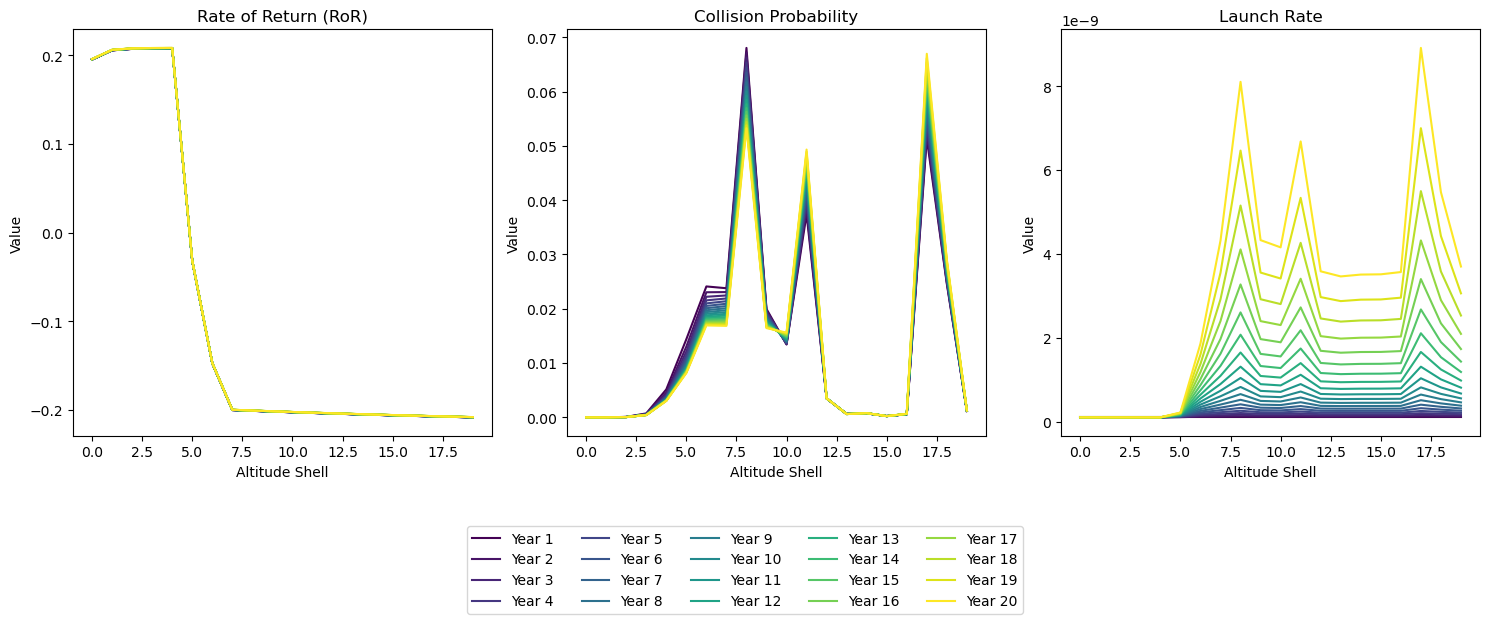

In [24]:
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.cm as cm

# Extract keys (timesteps) and sort
timesteps = sorted(data.keys(), key=int)

# Get number of altitude shells (assuming all timesteps have same length)
num_altitude_shells = len(data[timesteps[0]]["ror"])

# Prepare the figure
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Color map for time evolution
colors = cm.viridis(np.linspace(0, 1, len(timesteps)))

# Static Plot
for idx, timestep in enumerate(timesteps):
    ror = data[timestep]["ror"]
    collision_prob = data[timestep]["collision_probability"]
    launch_rate = data[timestep]["launch_rate"]

    axes[0].plot(range(num_altitude_shells), ror, color=colors[idx], label=f"Year {timestep}")
    axes[1].plot(range(num_altitude_shells), collision_prob, color=colors[idx])
    axes[2].plot(range(num_altitude_shells), launch_rate, color=colors[idx])

axes[0].set_title("Rate of Return (RoR)")
axes[1].set_title("Collision Probability")
axes[2].set_title("Launch Rate")

for ax in axes:
    ax.set_xlabel("Altitude Shell")
    ax.set_ylabel("Value")

fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=5)

plt.tight_layout()
plt.show()

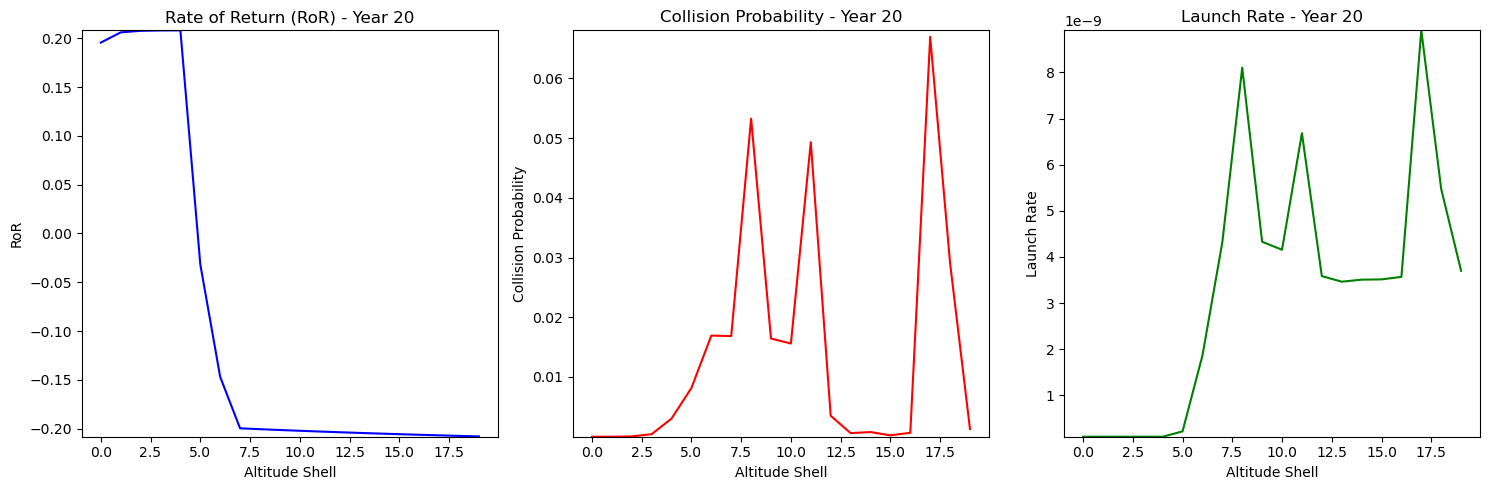

In [25]:
# Extract keys (timesteps) and sort
timesteps = sorted(data.keys(), key=int)

# Get number of altitude shells
num_altitude_shells = len(data[timesteps[0]]["ror"])

# Determine global min/max for each metric across all timesteps
ror_values = [val for timestep in timesteps for val in data[timestep]["ror"]]
collision_values = [val for timestep in timesteps for val in data[timestep]["collision_probability"]]
launch_values = [val for timestep in timesteps for val in data[timestep]["launch_rate"]]

ror_min, ror_max = min(ror_values), max(ror_values)
collision_min, collision_max = min(collision_values), max(collision_values)
launch_min, launch_max = min(launch_values), max(launch_values)

# Create the figure and axes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

def update(frame):
    timestep = timesteps[frame]
    ror = data[timestep]["ror"]
    collision_prob = data[timestep]["collision_probability"]
    launch_rate = data[timestep]["launch_rate"]

    for ax in axes:
        ax.clear()

    # Plot each metric with fixed y-axis limits
    axes[0].plot(range(num_altitude_shells), ror, color='b')
    axes[0].set_ylim(ror_min, ror_max)
    axes[0].set_title(f"Rate of Return (RoR) - Year {timestep}")
    axes[0].set_xlabel("Altitude Shell")
    axes[0].set_ylabel("RoR")

    axes[1].plot(range(num_altitude_shells), collision_prob, color='r')
    axes[1].set_ylim(collision_min, collision_max)
    axes[1].set_title(f"Collision Probability - Year {timestep}")
    axes[1].set_xlabel("Altitude Shell")
    axes[1].set_ylabel("Collision Probability")

    axes[2].plot(range(num_altitude_shells), launch_rate, color='g')
    axes[2].set_ylim(launch_min, launch_max)
    axes[2].set_title(f"Launch Rate - Year {timestep}")
    axes[2].set_xlabel("Altitude Shell")
    axes[2].set_ylabel("Launch Rate")

    plt.tight_layout()

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(timesteps), repeat=True)

# Save as GIF
ani.save("space_metrics_evolution.gif", writer="pillow", fps=2)

plt.show()